# 传染病模型 Epidemic Models

xyfJASON

> 参考资料：
>
> [关于传染病的数学模型有哪些？ - 酱紫君的回答 - 知乎](https://www.zhihu.com/question/367466399/answer/982597090)
>
> [传染病的数学模型 - 张戎的文章 - 知乎](https://zhuanlan.zhihu.com/p/103974270) 
>
> [简单算算，你宅在家里究竟能为抗击肺炎疫情做出多大贡献？ -  毕导THU  -  哔哩哔哩](https://www.bilibili.com/video/BV1j7411z7KQ)
>
> https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology


将人群划分为以下几类：

 - 易感者（Susceptibles）：未被感染，但有可能被感染的人群
 - 潜伏者（Exposed）：易感染，处于潜伏期的人群，可以细分为不具有传染性和具有传染性
 - 感染者（Infectives）：被感染的人群
 - 抵抗者 / 康复者 / 移除者（Resistances / Recovered / Removed）：感染者康复且获得抗性，即不会再被感染（包括死亡）

先说明一些参数：
 - $N$：总人数，保持恒定
 - $r$：感染者单位时间内接触的总人数
 - $\beta$：传染率，易感者接触感染者后感染的概率（如果有潜伏者，则为转变为潜伏者的概率）
 - $\gamma$：康复率
 - $\sigma$：潜伏者转变为感染者的概率，可取潜伏期时长的倒数



以下列举四种模型，更多模型见参考资料 wiki 链接。

## 1 SI 模型

只考虑易感者和感染者，且感染者无法康复，例如 HIV。

每个感染者单位时间接触 $r$ 人，这其中有 $\cfrac{S(t)}{N}$ 的比例是易感者，每个易感者又有 $\beta$ 的概率真的被感染，所以单位时间内，感染者增加了 $\cfrac{r\beta I(t)S(t)}{N}$，可以建立常微分方程：

$$
\begin{cases}
\cfrac{\mathrm dS}{\mathrm dt}=-\cfrac{r\beta IS}{N}\\
\cfrac{\mathrm dI}{\mathrm dt}=\cfrac{r\beta IS}{N}\\
S(0)=S_0,\,I(0)=I_0,\,S(t)+I(t)=N
\end{cases}
$$

解得：

$$
I(t)=\frac{NI_0}{I_0+(N-I_0)e^{-r\beta t}}
$$

这被称作 Logistic 函数。

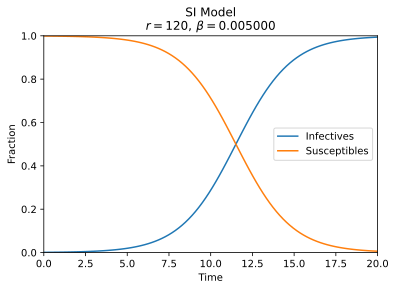

In [1]:
from epidemic import SI
%config InlineBackend.figure_format = 'svg'

model = SI(N=1000, r=120, beta=0.005, I0=1)
model.show(t_begin=0, t_end=20)

可以看见，最终所有人均会被感染。

## 2 SIS 模型

只考虑易感者和感染者，但感染者有可能康复，且康复后仍然有可能被感染，例如流感。

只需要在 SI 模型的微分方程中加上康复即可：

$$
\begin{cases}
\cfrac{\mathrm dS}{\mathrm dt}=-\cfrac{r\beta IS}{N}+\gamma I\\
\cfrac{\mathrm dI}{\mathrm dt}=\cfrac{r\beta IS}{N}-\gamma I\\
S(0)=S_0,\,I(0)=I_0,\,S(t)+I(t)=N
\end{cases}
$$

解得：

$$
I(t)=\frac{N(r\beta-\gamma)}{r\beta}/\left(\left(\frac{N(r\beta-\gamma)}{I_0r\beta}-1\right)e^{-(r\beta-\gamma)t}+1\right)
$$

这也是一个 Logistic 函数。

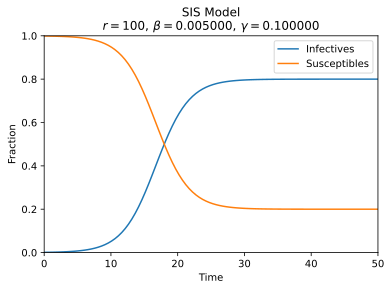

In [2]:
from epidemic import SIS

model = SIS(N=1000, r=100, beta=0.005, gamma=0.1, I0=1)
model.show(t_begin=0, t_end=50)

## 3 SIR 模型

考虑易感者、感染者和康复者，康复后不会被再次感染，例如麻疹。

只需要在 SIS 模型的微分方程中，把康复项加到康复者的方程即可：

$$
\begin{cases}
\cfrac{\mathrm dS}{\mathrm dt}=-\cfrac{r\beta IS}{N}\\
\cfrac{\mathrm dI}{\mathrm dt}=\cfrac{r\beta IS}{N}-\gamma I\\
\cfrac{\mathrm dR}{\mathrm dt}=\gamma I\\
S(0)=S_0,\,I(0)=I_0,\,R(0)=R_0,\,S(t)+I(t)+R(t)=N
\end{cases}
$$

这个方程没有解析解，我们只能求数值解。

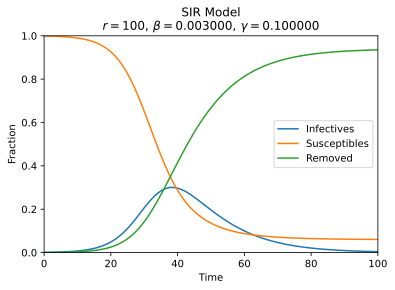

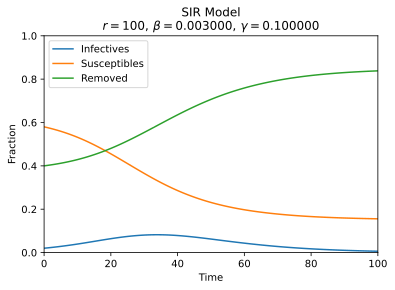

In [3]:
from epidemic import SIR

model = SIR(N=1000, r=100, beta=0.003, gamma=0.1, I0=1, R0=0)
model.show(t_begin=0, t_end=100)
model = SIR(N=1000, r=100, beta=0.003, gamma=0.1, I0=20, R0=400)
model.show(t_begin=0, t_end=100)

## 4 SEIR 模型

在 SIR 模型基础上，引入潜伏者，得到微分方程：

$$
\begin{cases}
\cfrac{\mathrm dS}{\mathrm dt}=-\cfrac{r\beta IS}{N}\\
\cfrac{\mathrm dE}{\mathrm dt}=\cfrac{r\beta IS}{N}-\sigma E\\
\cfrac{\mathrm dI}{\mathrm dt}=\sigma E-\gamma I\\
\cfrac{\mathrm dR}{\mathrm dt}=\gamma I\\
S(0)=S_0,\,I(0)=I_0,\,R(0)=R_0,\,E(0)=E_0,\,S(t)+E(t)+I(t)+R(t)=N
\end{cases}
$$

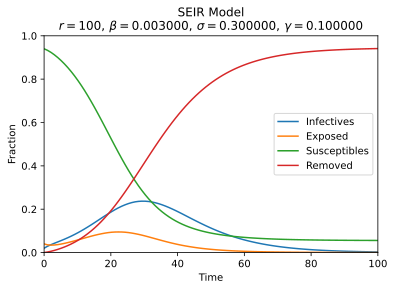

In [4]:
from epidemic import SEIR

model = SEIR(N=1000, r=100, beta=0.003, sigma=0.3, gamma=0.1, E0=40, I0=20, R0=0)
model.show(t_begin=0, t_end=100)